In [146]:
import numpy as np
import pandas as pd

In [147]:
insurance_df = pd.read_csv("insurance.csv")
insurance_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [148]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [149]:
insurance_df.shape

(1338, 7)

# Verificando se há dados faltando

In [150]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Verificando a porcentagem de homens e mulheres no dataset

In [151]:
insurance_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [152]:
male = 676 / insurance_df['sex'].count() * 100
female = 662 / insurance_df['sex'].count() * 100

print("Porcentagem de homens: ", str(round(male, 2)))
print("Porcentagem de mulheres: ", str(round(female, 2)))

Porcentagem de homens:  50.52
Porcentagem de mulheres:  49.48


# Verificando a quantidade de fumantes vs. não fumantes

In [153]:
insurance_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [154]:
fumantes = 274 / insurance_df['smoker'].count() * 100
n_fumantes = 1064 / insurance_df['smoker'].count() * 100

print("Porcentagem de fumantes: ", str(round(fumantes, 2)))
print("Porcentagem de não fumantes: ", str(round(n_fumantes, 2)))

Porcentagem de fumantes:  20.48
Porcentagem de não fumantes:  79.52


# Analisando as idades

In [155]:
insurance_df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

# Analisando as idades dividindo por sexo

In [156]:
male_mask = insurance_df['sex'] == "male"
insurance_male = insurance_df.loc[male_mask]
insurance_male['age'].describe()

count    676.000000
mean      38.917160
std       14.050141
min       18.000000
25%       26.000000
50%       39.000000
75%       51.000000
max       64.000000
Name: age, dtype: float64

In [157]:
insurance_male.shape

(676, 7)

In [158]:
female_mask = insurance_df['sex'] == "female"
insurance_female = insurance_df.loc[female_mask]
insurance_female['age'].describe()

count    662.000000
mean      39.503021
std       14.054223
min       18.000000
25%       27.000000
50%       40.000000
75%       51.750000
max       64.000000
Name: age, dtype: float64

In [159]:
insurance_female.shape

(662, 7)

In [160]:
import matplotlib.pyplot as plt
%matplotlib inline

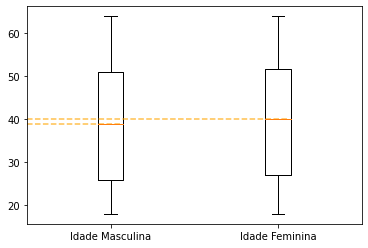

In [161]:
plt.boxplot(x=[insurance_male.age, insurance_female.age], labels=['Idade Masculina', 'Idade Feminina'])
plt.axhline(y=insurance_male.age.median(), color='orange', linestyle='--', xmax=0.28, alpha=0.7)
plt.axhline(y=insurance_female.age.median(), color='orange', linestyle='--', xmax=0.78, alpha=0.7)

# Criando um Hot Enconding da variável SEX

In [162]:
insurance_df[['female', 'male']] = pd.get_dummies(insurance_df.sex, prefix='sex')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


# Categorizando a variável 'smoker'

In [163]:
insurance_df['smoker'] = pd.get_dummies(insurance_df.smoker, prefix='smoker', drop_first=True)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,1,southwest,16884.92400,1,0
1,18,male,33.770,1,0,southeast,1725.55230,0,1
2,28,male,33.000,3,0,southeast,4449.46200,0,1
3,33,male,22.705,0,0,northwest,21984.47061,0,1
4,32,male,28.880,0,0,northwest,3866.85520,0,1


In [164]:
import seaborn as sns

<AxesSubplot:>

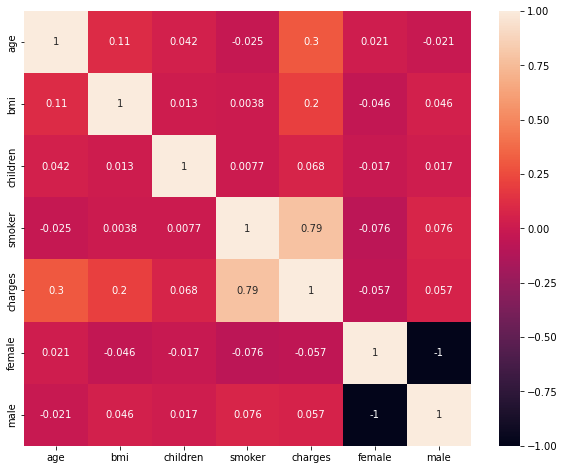

In [165]:
plt.figure(figsize=[10, 8])
sns.heatmap(insurance_df.corr(), vmin=-1, vmax=1, annot=True)

## Como era de se imaginar, a maior correlação entre o preço do seguro saúde é com o fator ser ou não fumante

### Idade e massa corporal vieram em seguida

# Vamos plotar o conjunto de pessoas que são fumantes vs. não fumantes para entender melhor a diferença de preço

<AxesSubplot:xlabel='smoker', ylabel='charges'>

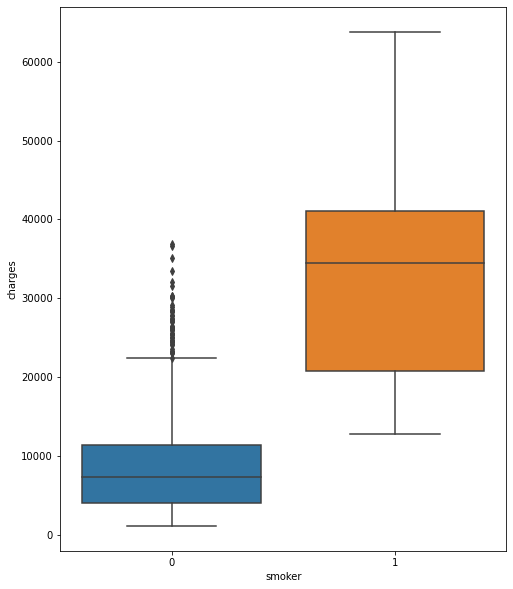

In [166]:
plt.figure(figsize=[8, 10])
sns.boxplot(x=insurance_df.smoker, y=insurance_df['charges'])

## Podemos perceber que há outliers no modelo, mas, com uma correlação de 0,79 podemos perceber que há uma grande diferença nos valores para fumantes vs. não fumantes, de todas as idades e massas corporais.

<AxesSubplot:xlabel='smoker', ylabel='count'>

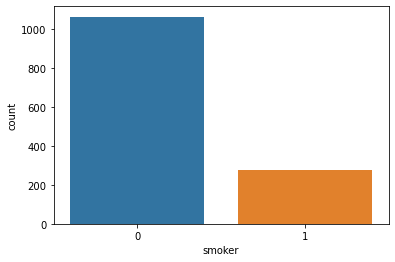

In [167]:
sns.countplot(x=insurance_df.smoker)


## Vamos analisar quantitativamente a os valores de quem fuma vs. quem não fuma

In [168]:
smoker_mask = insurance_df.smoker == 1
non_smoker_mask = insurance_df.smoker == 0
smoker_df = insurance_df.loc[smoker_mask]
non_smoker_df = insurance_df.loc[non_smoker_mask]

In [169]:
#Dados dos fumantes

smoker_df.describe()

,age,bmi,children,smoker,charges,female,male
count,274.000000,274.000000,274.000000,274.0,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,1.0,32050.231832,0.419708,0.580292
std,13.923186,6.318644,1.157066,0.0,11541.547176,0.494414,0.494414
min,18.000000,17.195000,0.000000,1.0,12829.455100,0.000000,0.000000
25%,27.000000,26.083750,0.000000,1.0,20826.244213,0.000000,0.000000
50%,38.000000,30.447500,1.000000,1.0,34456.348450,0.000000,1.000000
75%,49.000000,35.200000,2.000000,1.0,41019.207275,1.000000,1.000000
max,64.000000,52.580000,5.000000,1.0,63770.428010,1.000000,1.000000


In [170]:
#Dados dos não fumantes

non_smoker_df.describe()

,age,bmi,children,smoker,charges,female,male
count,1064.000000,1064.000000,1064.000000,1064.0,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,0.0,8434.268298,0.514098,0.485902
std,14.083410,6.043111,1.218136,0.0,5993.781819,0.500036,0.500036
min,18.000000,15.960000,0.000000,0.0,1121.873900,0.000000,0.000000
25%,26.750000,26.315000,0.000000,0.0,3986.438700,0.000000,0.000000
50%,40.000000,30.352500,1.000000,0.0,7345.405300,1.000000,0.000000
75%,52.000000,34.430000,2.000000,0.0,11362.887050,1.000000,1.000000
max,64.000000,53.130000,5.000000,0.0,36910.608030,1.000000,1.000000


# Vamos observar como as demais variáveis se comportam em relação ao valor do seguro

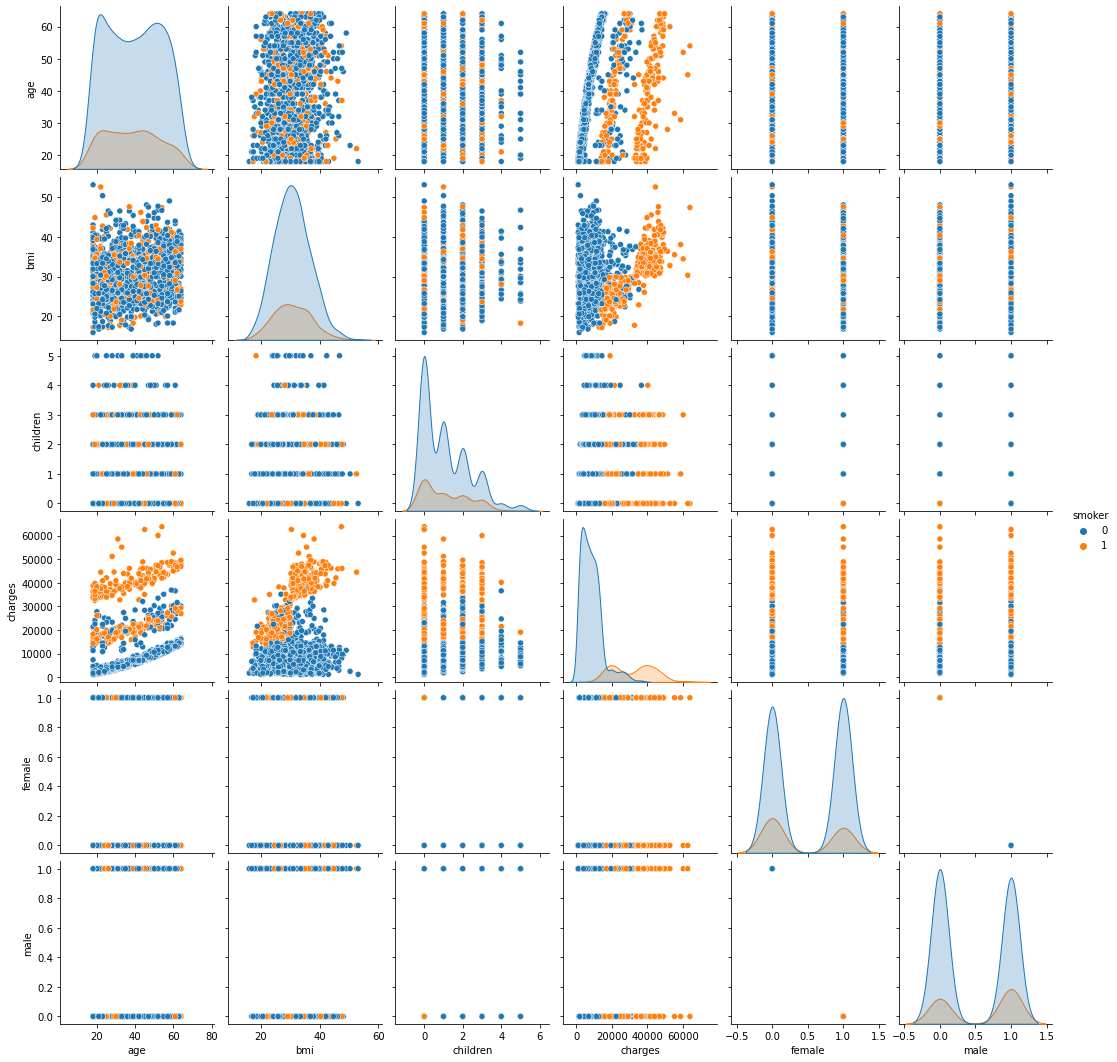

In [171]:
sns.pairplot(insurance_df, hue='smoker')

## Vamos obervar alguns gráficos relevantes

<AxesSubplot:xlabel='age', ylabel='charges'>

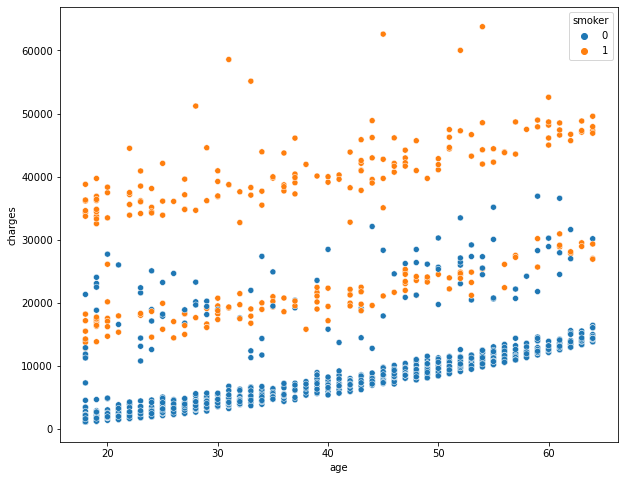

In [172]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x=insurance_df.age, y=insurance_df.charges, hue=insurance_df.smoker)

## Aqui podemos obervar a forte relação entre ser fumante vs. não fumante, e como a idade também interfere no preço do seguro. Entrentanto, podemos perceber que há uma intersecção em que os pontos se confundem, entrem os fumantes e os não fumantes. Qual variável será que interfere aqui? 

<AxesSubplot:xlabel='age', ylabel='charges'>

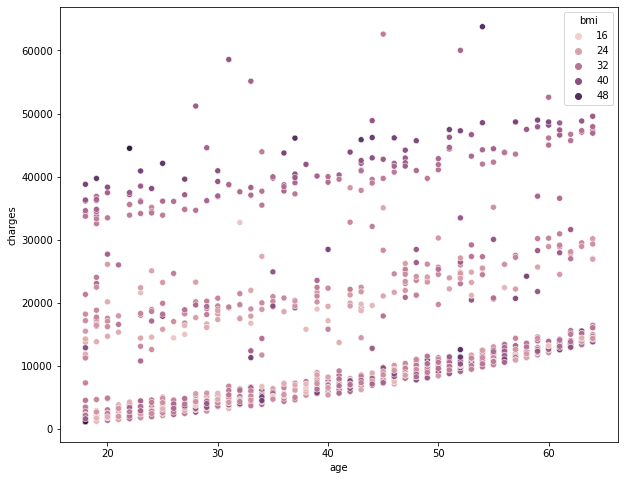

In [173]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x=insurance_df.age, y=insurance_df.charges, hue=insurance_df.bmi)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

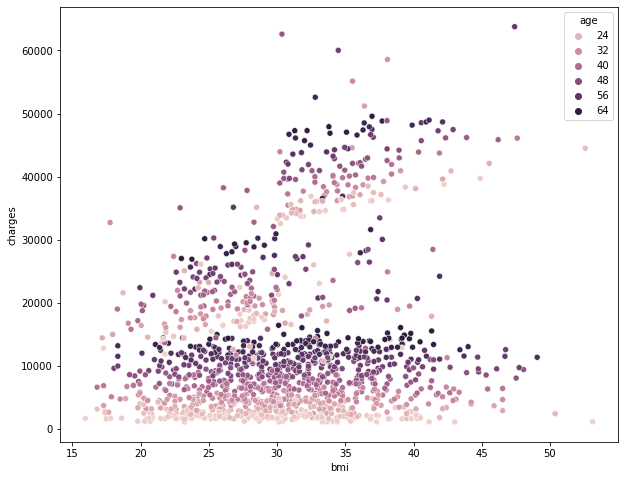

In [174]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x=insurance_df.bmi, y=insurance_df.charges, hue=insurance_df.age)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

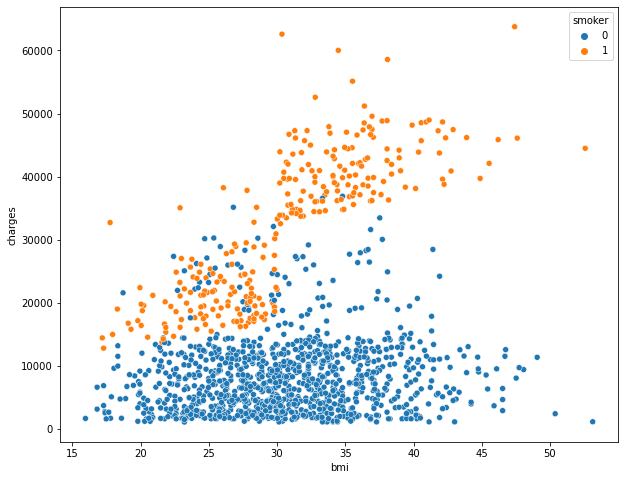

In [175]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x=insurance_df.bmi, y=insurance_df.charges, hue=insurance_df.smoker)

In [176]:
data_corr = insurance_df[['charges', 'age', 'bmi', 'smoker']]
data_corr.corr()

,charges,age,bmi,smoker
charges,1.000000,0.299008,0.198341,0.787251
age,0.299008,1.000000,0.109272,-0.025019
bmi,0.198341,0.109272,1.000000,0.003750
smoker,0.787251,-0.025019,0.003750,1.000000


## Parece que há uma pequena correlação entre a massa corporal e o valor final do seguro, mais do que a variável sexo

<AxesSubplot:xlabel='age', ylabel='charges'>

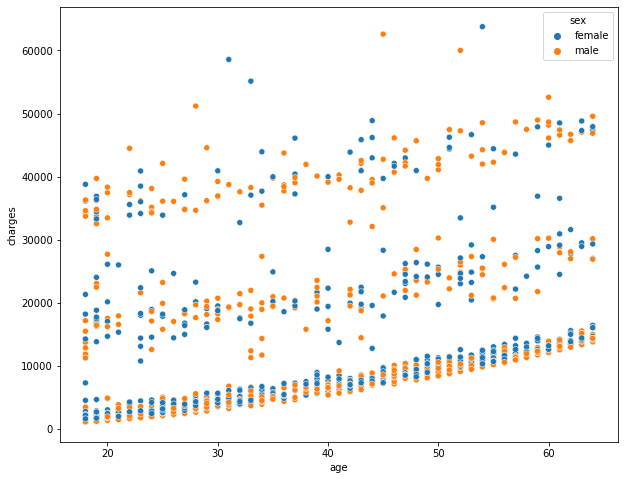

In [177]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x=insurance_df.age, y=insurance_df.charges, hue=insurance_df.sex)

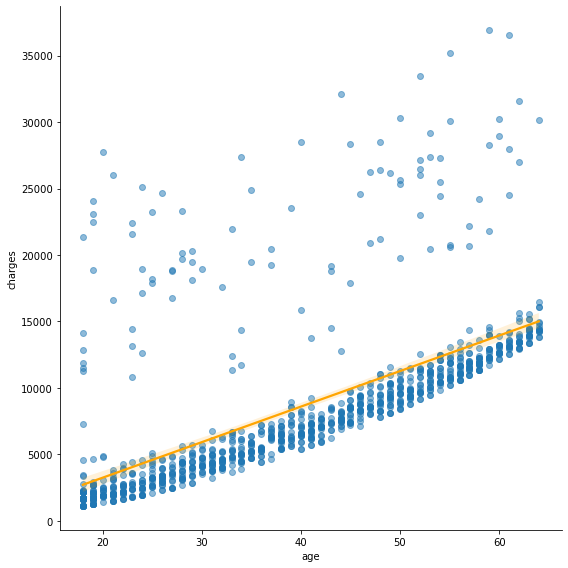

In [178]:
sns.lmplot(x='age', y='charges', data=non_smoker_df, scatter_kws={'alpha':0.5}, line_kws={'color':'orange'}, height=8, aspect=1)

## Apesar de ser possível traçarmos uma linha quase paralela com a maior parte dos dados, a quantidade de dados outliers em cima não parece que a regressão linear com os dados dos não fumantes explica muito bem o comportamento da variação do valor do seguro

### Vamos verificar o quão bem essa linha explica os dados

In [179]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [180]:
X = np.array(non_smoker_df['age']).reshape(-1, 1)
y = np.array(non_smoker_df['charges']).reshape(-1, 1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1)

In [184]:
model = linear_model.LinearRegression()
model = model.fit(Xtrain, ytrain)

In [185]:
model.coef_

array([[276.29345999]])

In [186]:
model.intercept_

array([-2525.03352619])

In [187]:
test_sklearn = np.array(Xtest).reshape(-1, 1)
model.predict(test_sklearn)

array([[10460.75909314],
       [11565.93293308],
       [12947.40023301],
       [ 3277.12913351],
       [10737.05255312],
       [ 2724.54221354],
       [11565.93293308],
       [14881.45445291],
       [11842.22639306],
       [ 6040.06373336],
       [ 8250.41141325],
       [12671.10677302],
       [ 4934.88989342],
       [10737.05255312],
       [ 8526.70487324],
       [ 9079.29179321],
       [ 7697.82449328],
       [ 9079.29179321],
       [13499.98715298],
       [ 3829.71605348],
       [12118.51985305],
       [15157.74791289],
       [ 3553.42259349],
       [ 6592.65065334],
       [ 8526.70487324],
       [ 9355.58525319],
       [ 3277.12913351],
       [ 2724.54221354],
       [13499.98715298],
       [ 2448.24875355],
       [ 8526.70487324],
       [ 5211.18335341],
       [13223.69369299],
       [ 6316.35719335],
       [ 8802.99833322],
       [10184.46563315],
       [ 2448.24875355],
       [ 7421.53103329],
       [14328.86753293],
       [12394.81331304],


In [188]:
ypred = model.predict(Xtest)
ypred

array([[10460.75909314],
       [11565.93293308],
       [12947.40023301],
       [ 3277.12913351],
       [10737.05255312],
       [ 2724.54221354],
       [11565.93293308],
       [14881.45445291],
       [11842.22639306],
       [ 6040.06373336],
       [ 8250.41141325],
       [12671.10677302],
       [ 4934.88989342],
       [10737.05255312],
       [ 8526.70487324],
       [ 9079.29179321],
       [ 7697.82449328],
       [ 9079.29179321],
       [13499.98715298],
       [ 3829.71605348],
       [12118.51985305],
       [15157.74791289],
       [ 3553.42259349],
       [ 6592.65065334],
       [ 8526.70487324],
       [ 9355.58525319],
       [ 3277.12913351],
       [ 2724.54221354],
       [13499.98715298],
       [ 2448.24875355],
       [ 8526.70487324],
       [ 5211.18335341],
       [13223.69369299],
       [ 6316.35719335],
       [ 8802.99833322],
       [10184.46563315],
       [ 2448.24875355],
       [ 7421.53103329],
       [14328.86753293],
       [12394.81331304],


In [189]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))

MAE: 2719.15
MSE: 24742816.76
RMSE: 4974.22
R2: 0.3


## Como nosso R2 foi de apenas 0,3 então esse modelo realmente não explica bem os dados dos não fumantes com o comportamento da variação do valor do seguro